In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder

from sklearn.tree import DecisionTreeClassifier

import sys
import os

sys.path.append(os.path.abspath("../.."))

from utils.evaluation import Evaluation
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE
from collections import Counter


pd.set_option("display.max_columns", None)

In [2]:
path = "../../data/diabetes_processed_dataset.csv"

df = pd.read_csv(path)

In [4]:
X = df.drop(['diabetes'], axis = 1)
y = df['diabetes']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
encoder = TargetEncoder(cols=['location'])
X_train['location'] = encoder.fit_transform(X_train['location'], y_train)
X_test['location'] = encoder.transform(X_test['location'])

In [7]:
tree = DecisionTreeClassifier(random_state=42)

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

Accuracy: 0.9515


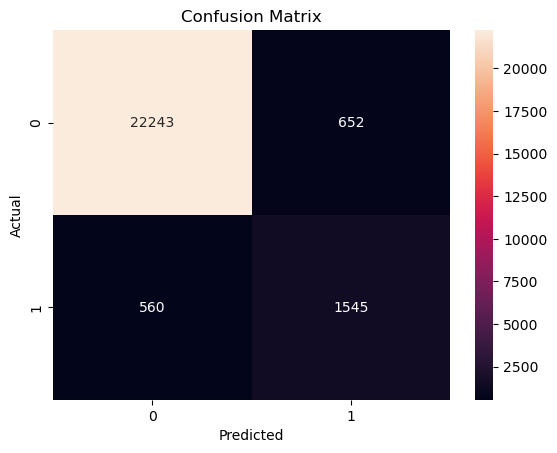

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     22895
           1       0.70      0.73      0.72      2105

    accuracy                           0.95     25000
   macro avg       0.84      0.85      0.85     25000
weighted avg       0.95      0.95      0.95     25000



In [8]:
eval = Evaluation()

eval.evaluate_model(y_test, y_pred)

In [9]:
counter = Counter(y_train)
print('Before', counter)

Before Counter({0: 68605, 1: 6395})


In [10]:
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

In [11]:
counter = Counter(y_train_sm)
print('After', counter)

After Counter({0: 68605, 1: 68605})


In [12]:
tree = DecisionTreeClassifier(random_state=42)

tree.fit(X_train_sm, y_train_sm)
y_pred = tree.predict(X_test)

Accuracy: 0.9501


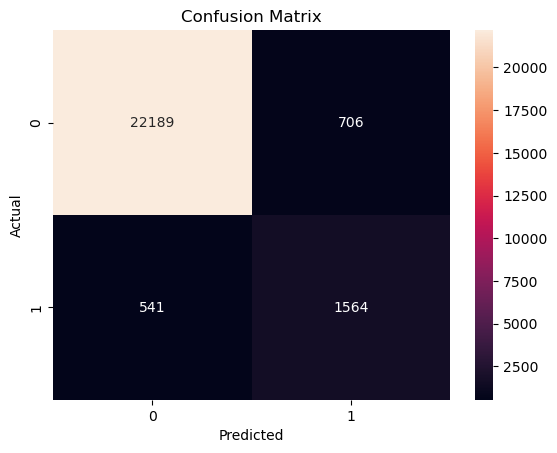

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     22895
           1       0.69      0.74      0.71      2105

    accuracy                           0.95     25000
   macro avg       0.83      0.86      0.84     25000
weighted avg       0.95      0.95      0.95     25000



In [13]:
eval = Evaluation()

eval.evaluate_model(y_test, y_pred)